<a href="https://colab.research.google.com/github/LVanessaS/Space-Mission-Launches/blob/main/Space_Mission_Launches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook se realizar√° la limpieza, transformaci√≥n y an√°lisis del dataset:
https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization

# ***SPACE MISSION LAUNCHES***

# **1. EL PROBLEMA DEL NEGOCIO**


Las preguntas que resolveremos en este an√°lisis son:

*   ¬øQu√© organizaci√≥n lanz√≥ m√°s misiones espaciales en un a√±o determinado?
*  ¬øCu√°ntos lanzamientos se realizaron por a√±o?
*   ¬øC√≥mo ha variado el costo de una misi√≥n espacial a lo largo del tiempo?
*   ¬øQu√© meses son los m√°s populares para los lanzamientos?
*   ¬øSe han vuelto m√°s seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

# **2. EL SET DE DATOS**


Este Data set incluye todas las misiones espaciales desde el comienzo de la carrera espacial entre EE.UU y la Uni√≥n Sovi√©tica.

La informaci√≥n recolectada se encuentra en un archivo CSV (mission_launches.csv) y cuenta con 4324 filas y 9 columnas.
En esta data encontramos las siguientes columnas:



1.   **"Organisation"**: Organizaci√≥n o empresa que lider√≥ el lanzamiento espacial.
2.   **"Location"**: Pa√≠s que lider√≥ el lanzamiento espacial.

1.   **"Date"**: Fecha de lanzamiento.
2.   **"Detail"**: Detalles del lanzamiento espacial.

1.   **"Rocket_Status"**: Pais
2.   **"Price"**: Valor del lanzamiento espacial.

1.   **"Mission_Status"**: Estado de la misi√≥n: Exito o Fracaso.
2.   **"Unnamed: 0.1"**: Id

1.   **"Unnamed: 0"**: Id

# **3. UNA PRIMERA MIRADA AL DATASET**

In [1]:
#Importamos las librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lectura del dataset
df = pd.read_csv('/content/mission_launches.csv')

In [2]:
print(df.shape)
df.head()

(4324, 9)


Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# **4. LIMPIEZA**

## Columnas innecesarias

Empezaremos eliminando las columnas **Unnamed: 0.1** y **Unnamed: 0** ya que no nos brindan informaci√≥n de interes para las preguntas que queremos responder.

In [4]:
#Acotamos las columnas necesarias.
df = df[['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']]
# Separamos la informaci√≥n de la columna "Location".
df[['Location_1','Location_2','Location_3','Location_4']] = df["Location"].str.split(',', expand=True)

<ipython-input-4-7202470383ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Location_1','Location_2','Location_3','Location_4']] = df["Location"].str.split(',', expand=True)


In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date']=df['Date'].astype(str)

df['Date_N'] = df['Date'].apply(lambda x: x[0:10] if x else '')
df['Date_N'] = pd.to_datetime(df['Date_N'],format = '%Y-%m-%d' ,errors='coerce')

In [6]:
# Conteo de los niveles en las diferentes columnas categ√≥ricas
cols_cat = ['Organisation', 'Location', 'Location_1','Location_2','Location_3','Location_4', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status','Date_N']

for col in cols_cat:
  print(f'Columna¬†{col}: {df[col].nunique()} subniveles')

Columna¬†Organisation: 56 subniveles
Columna¬†Location: 137 subniveles
Columna¬†Location_1: 130 subniveles
Columna¬†Location_2: 44 subniveles
Columna¬†Location_3: 26 subniveles
Columna¬†Location_4: 3 subniveles
Columna¬†Detail: 4278 subniveles
Columna¬†Rocket_Status: 2 subniveles
Columna¬†Price: 56 subniveles
Columna¬†Mission_Status: 4 subniveles
Columna¬†Date_N: 3922 subniveles


In [ ]:
df.describe()

## Valores nulos o faltantes

Ac√° comenzamos a ver que los datos no est√°n completos, pues no todas las columnas tienen la misma cantidad de registros.

El n√∫mero total de registros deber√≠a ser 4323. Sin embargo la columna "Price" tiene solo 964 valores no nulos.


In [8]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].replace(',', '', regex=True)
df['Price'] = df['Price'].astype(float)


In [9]:
df['Price'] = df['Price'].interpolate(method='linear')
df.describe()

Price
count  4324.000000
mean    412.842550
std     494.527627
min       5.300000
25%      62.000000
50%     209.928571
75%     594.922402
max    5000.000000

## Valores duplicados

In [10]:
print(f'Tama√±o del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tama√±o del set despu√©s de eliminar las filas repetidas: {df.shape}')

Tama√±o del set antes de eliminar las filas repetidas: (4324, 12)
Tama√±o del set despu√©s de eliminar las filas repetidas: (4323, 12)


In [11]:
df['Country'] = df['Location_3']

df['Country'].fillna(df['Location_2'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   object        
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           4323 non-null   float64       
 6   Mission_Status  4323 non-null   object        
 7   Location_1      4323 non-null   object        
 8   Location_2      4323 non-null   object        
 9   Location_3      4300 non-null   object        
 10  Location_4      1650 non-null   object        
 11  Date_N          4323 non-null   datetime64[ns]
 12  Country         4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 472.8+ KB


## Valores extremos

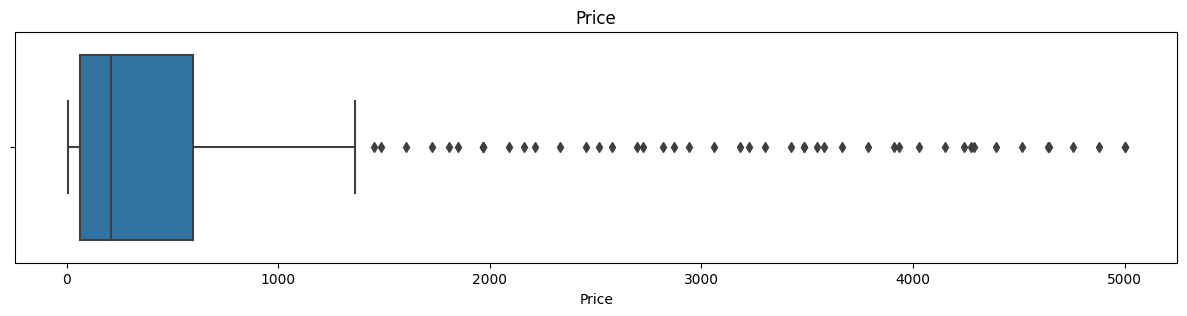

In [13]:
# Generar gr√°ficas individuales pues las variables num√©ricas
# est√°n en rangos diferentes

cols_num = ['Price']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(col)

## Errores tipogr√°ficos

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


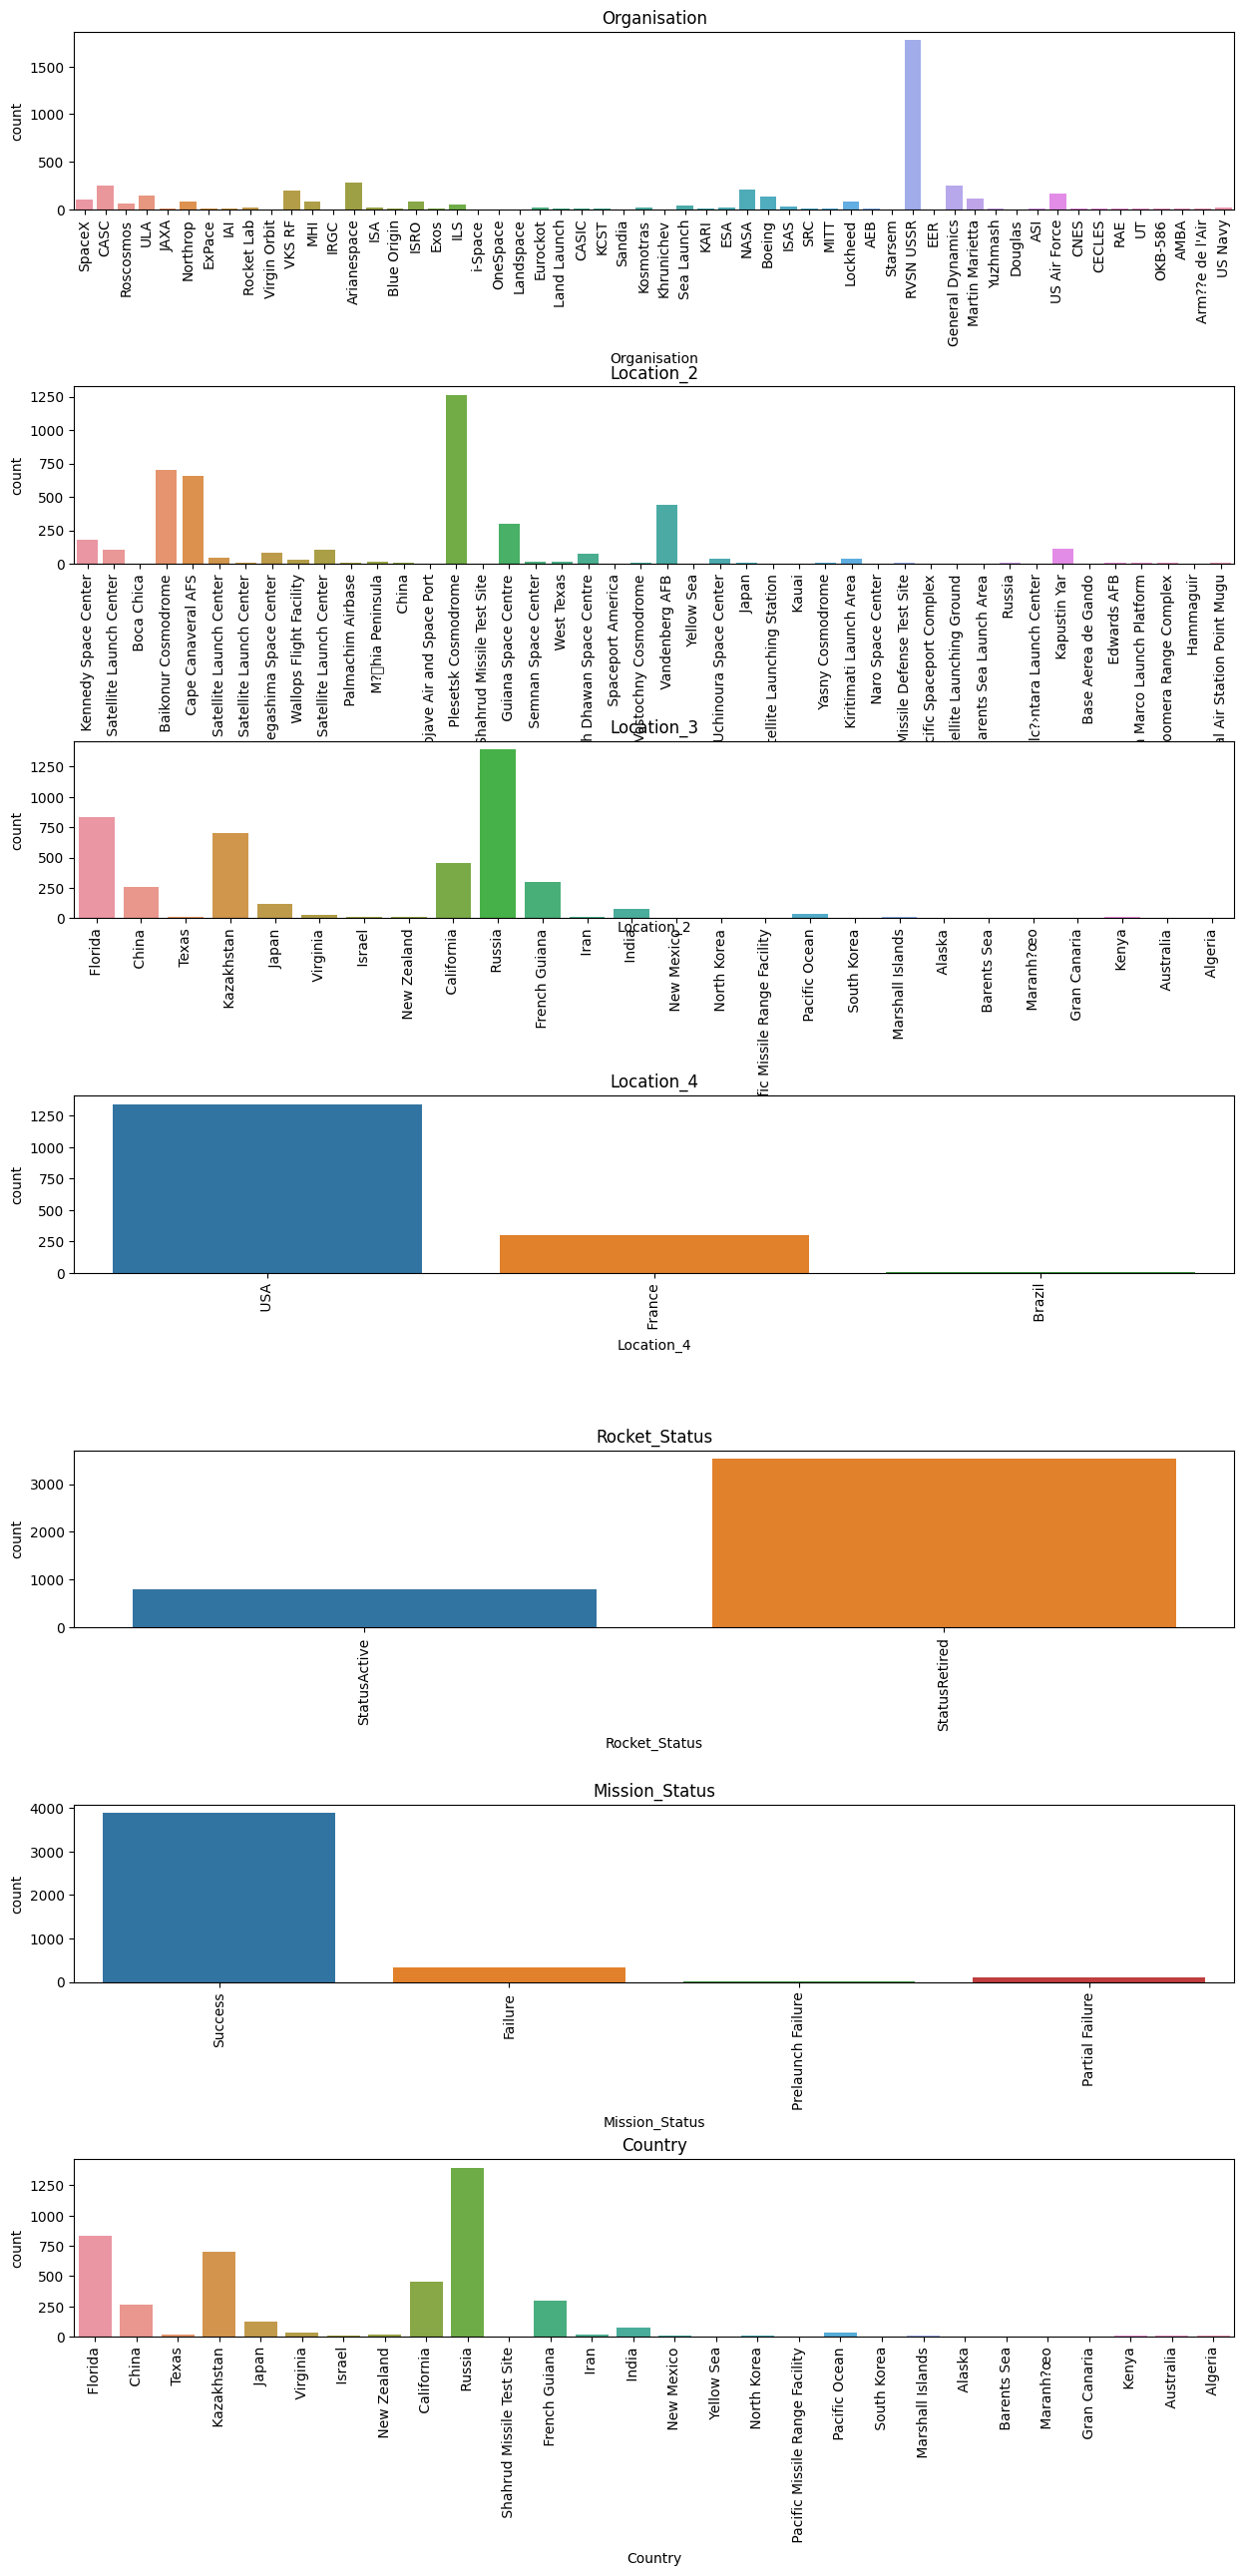

In [14]:
# Graficar los subniveles de cada variable categ√≥rica

cols_cat = ['Organisation','Location_2','Location_3','Location_4', 'Rocket_Status', 'Mission_Status','Country']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(15,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

##**5. RESPUESTAS PREGUNTAS**



---



---



*   ***¬øQu√© organizaci√≥n lanz√≥ m√°s misiones espaciales en un a√±o determinado?*** üöÄüöÄüöÄ


In [15]:
df['Year'] = df['Date_N'].dt.year

In [17]:
# Agrupar por 'A√±o' y 'Organizaciones' y contar la cantidad de lanzamientos
conteo_lanzamientos = df.groupby(['Year', 'Organisation']).size().reset_index(name='Cantidad')

# Encontrar la organizaci√≥n que lanz√≥ m√°s misiones en cada a√±o
max_lanzamientos_por_a√±o = conteo_lanzamientos.loc[conteo_lanzamientos.groupby('Year')['Cantidad'].idxmax()]

max_lanzamientos_por_a√±o_ordenado = max_lanzamientos_por_a√±o.sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
max_lanzamientos_por_a√±o_ordenado.head(5)


Year Organisation  Cantidad
139  1977    RVSN USSR        97
132  1976    RVSN USSR        95
93   1971    RVSN USSR        93
125  1975    RVSN USSR        89
80   1970    RVSN USSR        87

La organizaci√≥n que m√°s misiones espaciales realiz√≥ en un a√±o determinado fue ***RVSN USSR***, y fue en el a√±o 1977 realizando 97 lanzamientos.‚úÖ



---



---



*  ***¬øCu√°ntos lanzamientos se realizaron por a√±o?*** üöÄüöÄüöÄ


In [18]:
lanzamientos_por_a√±o = df.groupby('Year').size().reset_index(name='Cantidad')
lanzamientos_por_a√±o_ordenado = lanzamientos_por_a√±o.sort_values(by='Cantidad', ascending=False)
lanzamientos_por_a√±o_ordenado

Year  Cantidad
14  1971       119
61  2018       117
20  1977       114
19  1976       113
18  1975       113
..   ...       ...
53  2010        37
48  2005        37
1   1958        28
2   1959        20
0   1957         3

[64 rows x 2 columns]

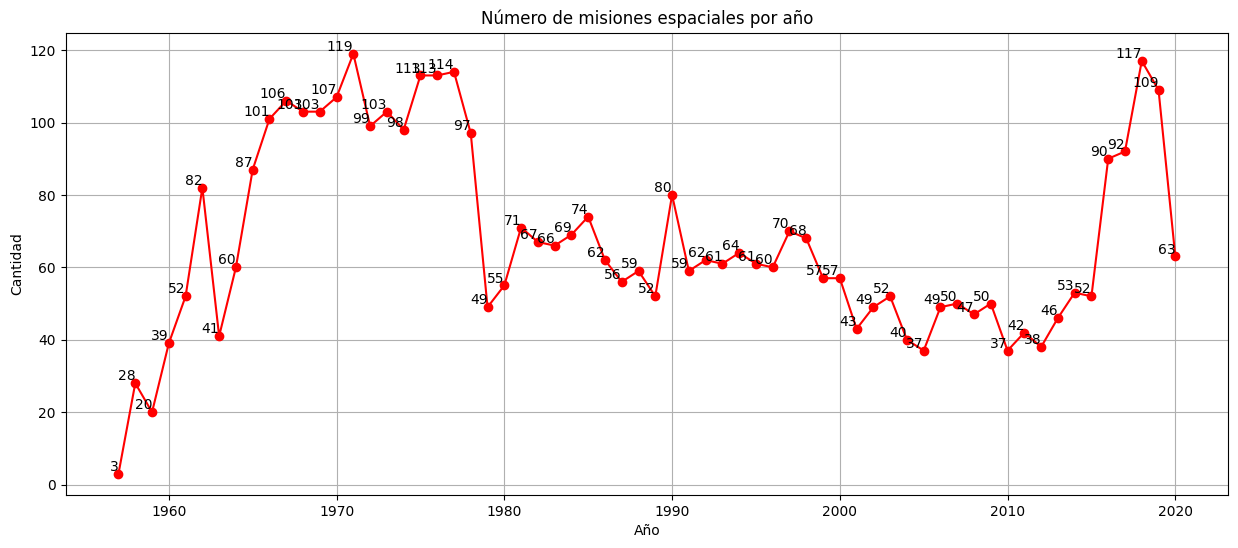

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(lanzamientos_por_a√±o['Year'], lanzamientos_por_a√±o['Cantidad'], marker='o', linestyle='-', color='red')
plt.title('N√∫mero de misiones espaciales por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Cantidad')
plt.grid(True)

for i, row in lanzamientos_por_a√±o.iterrows():
    plt.text(row['Year'], row['Cantidad'], str(row['Cantidad']), ha='right', va='bottom')


plt.show()



---



---



*   ***¬øC√≥mo ha variado el costo de una misi√≥n espacial a lo largo del tiempo?*** üöÄüöÄüöÄ


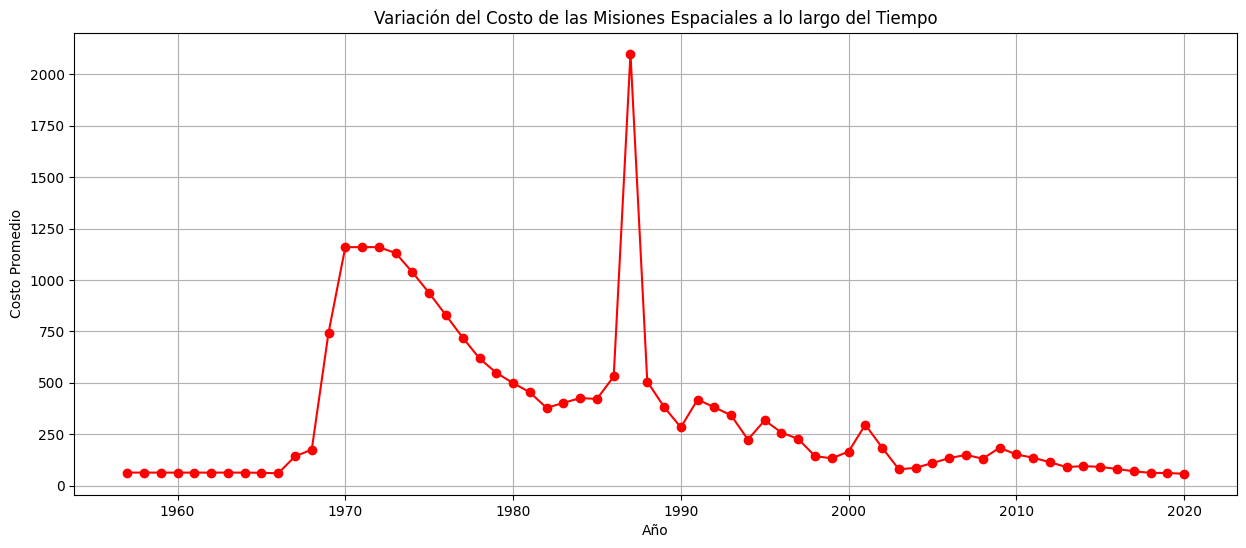

In [20]:
# Agrupar por 'A√±o' y calcular el costo promedio de las misiones espaciales
costo_promedio_por_a√±o = df.groupby('Year')['Price'].mean().reset_index()

# Graficar la variaci√≥n del costo a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(costo_promedio_por_a√±o['Year'], costo_promedio_por_a√±o['Price'], marker='o', linestyle='-', color='red')
plt.title('Variaci√≥n del Costo de las Misiones Espaciales a lo largo del Tiempo')
plt.xlabel('A√±o')
plt.ylabel('Costo Promedio')
plt.grid(True)
plt.show()


El costo de las misiones espaciales ha tenido un decrecimiento importante, en la √∫ltima d√©cada las misiones no superan los 100 millones de dolares. ‚úÖ



---



---



*   ***¬øQu√© meses son los m√°s populares para los lanzamientos?***üöÄüöÄüöÄ


In [21]:
df['Month'] = df['Date_N'].dt.month

In [22]:
lanzamientos_por_mes = df.groupby('Month').size().reset_index(name='Cantidad')
lanzamientos_por_mes_ordenado = lanzamientos_por_mes.sort_values(by='Cantidad', ascending=False)
lanzamientos_por_mes_ordenado

Month  Cantidad
11     12       450
5       6       402
3       4       383
9      10       381
7       8       373
8       9       365
2       3       353
6       7       351
1       2       336
10     11       335
4       5       326
0       1       268

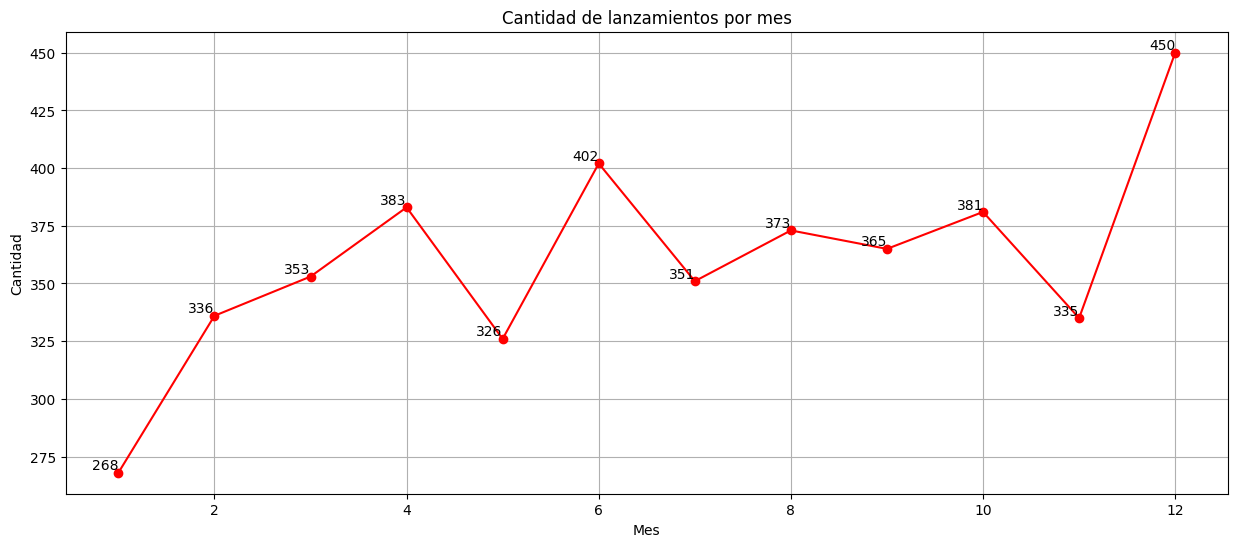

In [23]:
# Agrupar por 'A√±o' y calcular el costo promedio de las misiones espaciales
lanzamientos_por_mes = df.groupby('Month').size().reset_index(name='Cantidad')

# Graficar la variaci√≥n del costo a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(lanzamientos_por_mes['Month'], lanzamientos_por_mes['Cantidad'], marker='o', linestyle='-', color='red')
plt.title('Cantidad de lanzamientos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.grid(True)

# Agregar etiquetas de texto en cada v√©rtice
for i, row in lanzamientos_por_mes.iterrows():
    plt.text(row['Month'], row['Cantidad'], str(row['Cantidad']), ha='right', va='bottom')

plt.show()

El mes m√°s popular para realizar lanzamientos es ***Diciembre***. ‚úÖ



---



---



*   ***¬øSe han vuelto m√°s seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?***üöÄüöÄüöÄ

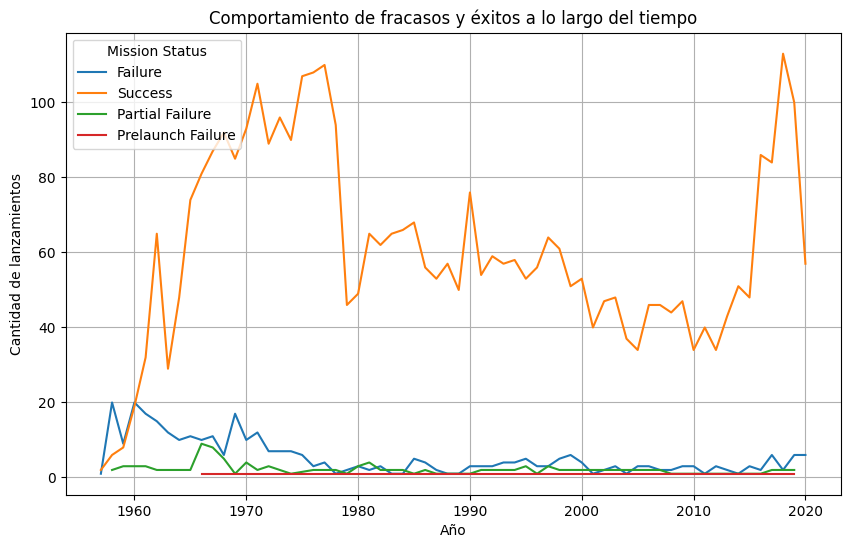

In [24]:
# Agrupar por 'Year' y 'Mission_Status' y contar la cantidad de lanzamientos
cambios_lanzamientos = df.groupby(['Year', 'Mission_Status']).size().reset_index()

# Crear un gr√°fico de l√≠nea
plt.figure(figsize=(10, 6))
for status in cambios_lanzamientos['Mission_Status'].unique():
    subset = cambios_lanzamientos[cambios_lanzamientos['Mission_Status'] == status]
    plt.plot(subset['Year'], subset[0], label=status)

# Configurar la leyenda y su ubicaci√≥n
plt.legend(title='Mission Status', loc='upper left')

# Configurar elementos del gr√°fico
plt.title('Comportamiento de fracasos y √©xitos a lo largo del tiempo')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de lanzamientos')
plt.grid(True)
plt.show()


Sin duda, las posibilidades de fracaso (Linea Azul) han disminuido significativamente con los a√±os, por lo que cada vez es menos com√∫n que una misi√≥n espacial fall√©. Adem√°s, aunque las cifras de √©xito (Linea anaranjada) son significaticas, estas no presentan un patr√≥n de crecimiento o decrecimiento. ‚úÖ